Load the Data


In [128]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [129]:
fetch_housing_data()

In [130]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [131]:
housing = load_housing_data()

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Selecting Data set

In [132]:
# Select only the 'longitude', 'latitude', and 'median_income' columns for clustering
new_data = housing[['longitude', 'latitude', 'median_income']]

In [93]:
# Display the first few rows to verify the selected columns
new_data.head()

longitude  latitude  median_income
0    -122.23     37.88         8.3252
1    -122.22     37.86         8.3014
2    -122.24     37.85         7.2574
3    -122.25     37.85         5.6431
4    -122.25     37.85         3.8462

In [94]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   longitude      20640 non-null  float64
 1   latitude       20640 non-null  float64
 2   median_income  20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


# Scale data to Standardize Values

In [133]:

# Min-Max Scaling to [0, 1]
new_data_scaled = (new_data - new_data.min()) / (new_data.max() - new_data.min())

In [125]:
new_data_scaled.head()

longitude  latitude  median_income
0   0.211155  0.567481       0.539668
1   0.212151  0.565356       0.538027
2   0.210159  0.564293       0.466028
3   0.209163  0.564293       0.354699
4   0.209163  0.564293       0.230776

# KMeans Clustering

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

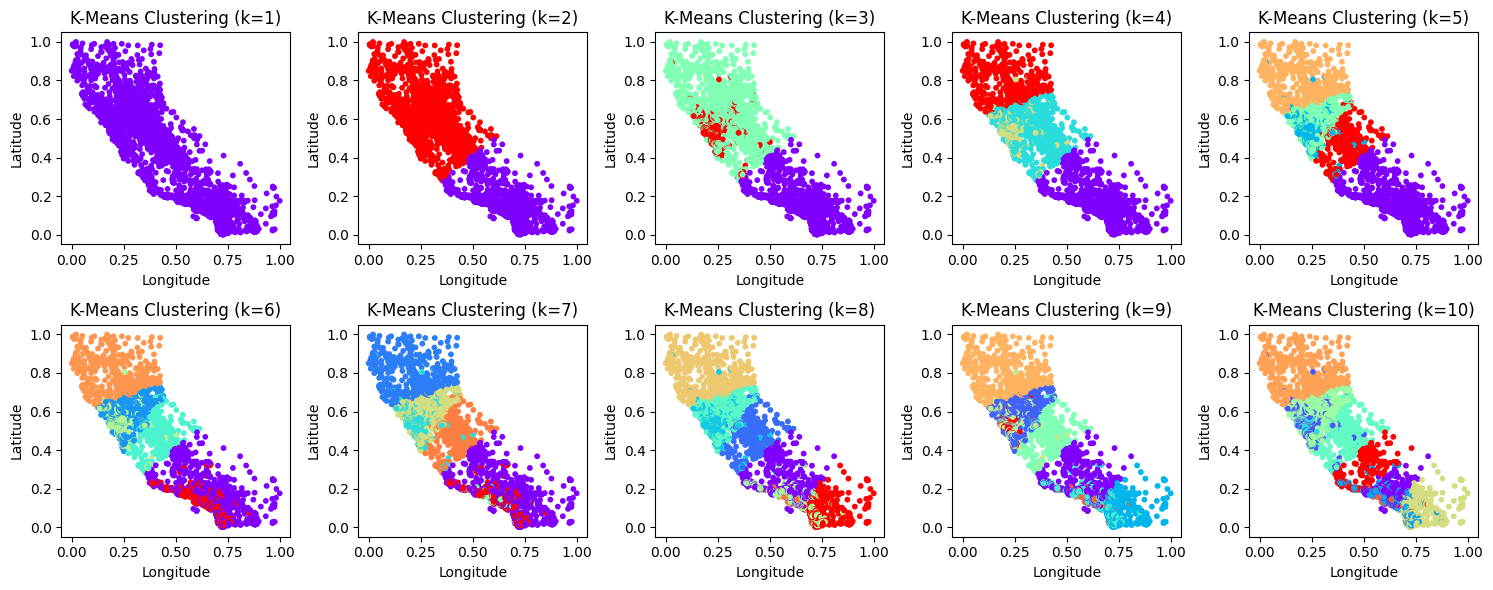

In [111]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows, 5 columns of subplots

# Flatten the axes array to easily iterate through subplots
axes = axes.flatten()

# Apply KMeans clustering and plot for k = 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    new_data_scaled['cluster'] = kmeans.fit_predict(new_data_scaled)

    # Scatter plot of clusters
    axes[k-1].scatter(new_data_scaled['longitude'], new_data_scaled['latitude'],
                      c=new_data_scaled['cluster'], cmap='rainbow', s=10)
    axes[k-1].set_title(f"K-Means Clustering (k={k})")
    axes[k-1].set_xlabel('Longitude')
    axes[k-1].set_ylabel('Latitude')

plt.tight_layout()
plt.show()

In [112]:
new_data_scaled.head()


longitude  latitude  median_income  cluster
0   0.211155  0.567481       0.539668        3
1   0.212151  0.565356       0.538027        3
2   0.210159  0.564293       0.466028        3
3   0.209163  0.564293       0.354699        1
4   0.209163  0.564293       0.230776        5

# Elbow Plot

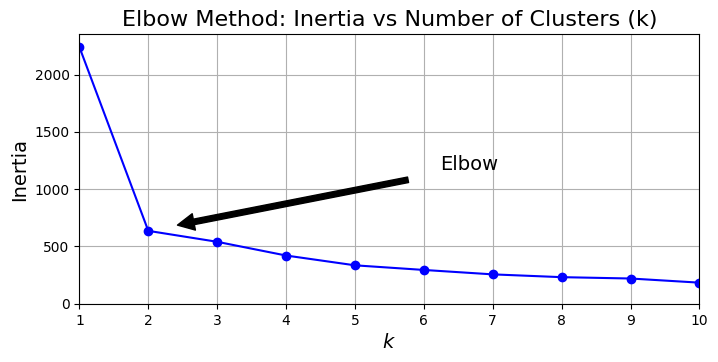

In [113]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Use the scaled dataset new_data_scaled (from previous steps) which contains 'longitude', 'latitude', 'median_income'
X = new_data_scaled[['longitude', 'latitude', 'median_income']]

# Apply K-Means clustering for k=1 to 10 and calculate inertias
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 11)]
inertias = [model.inertia_ for model in kmeans_per_k]

# Plot the Elbow Method graph
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 11), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.title("Elbow Method: Inertia vs Number of Clusters (k)", fontsize=16)

# Annotate the elbow point
plt.annotate('Elbow',
             xy=(2, inertias[1]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1))

plt.axis([1, 10, 0, max(inertias) * 1.05])  # Adjust the axis range to fit the plot
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


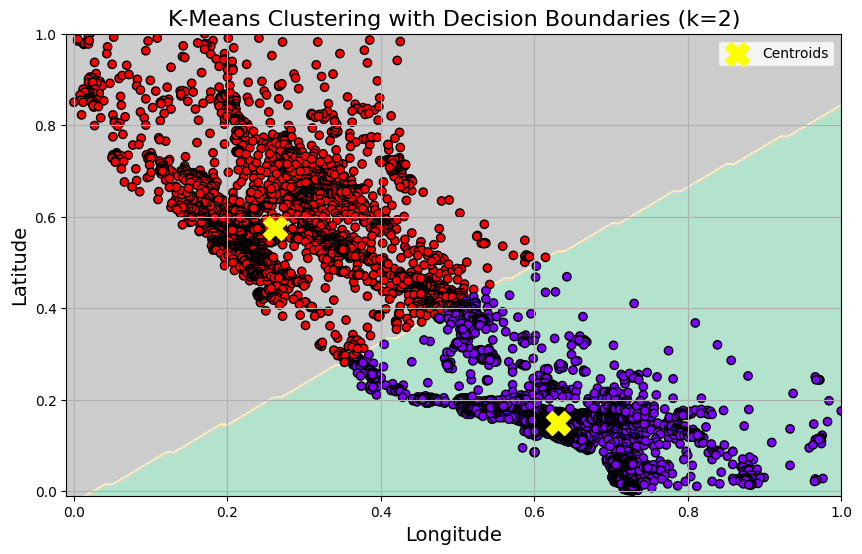

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Use longitude and latitude for plotting
X = new_data_scaled[['longitude', 'latitude']]

# Train KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=2, random_state=42)  # Use optimal k from the elbow method
kmeans.fit(X)

# Create a meshgrid for the feature space (longitude, latitude)
x_min, x_max = X['longitude'].min() - 0.01, X['longitude'].max() + 0.01
y_min, y_max = X['latitude'].min() - 0.01, X['latitude'].max() + 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the cluster for each point in the meshgrid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the result to match the shape of the meshgrid
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap='Pastel2')  # Plot decision boundaries

# Plot the actual data points
plt.scatter(X['longitude'], X['latitude'], c=kmeans.labels_, cmap='rainbow', edgecolor='k')

# Plot the cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', marker='X', label='Centroids')

plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('K-Means Clustering with Decision Boundaries (k=2)', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


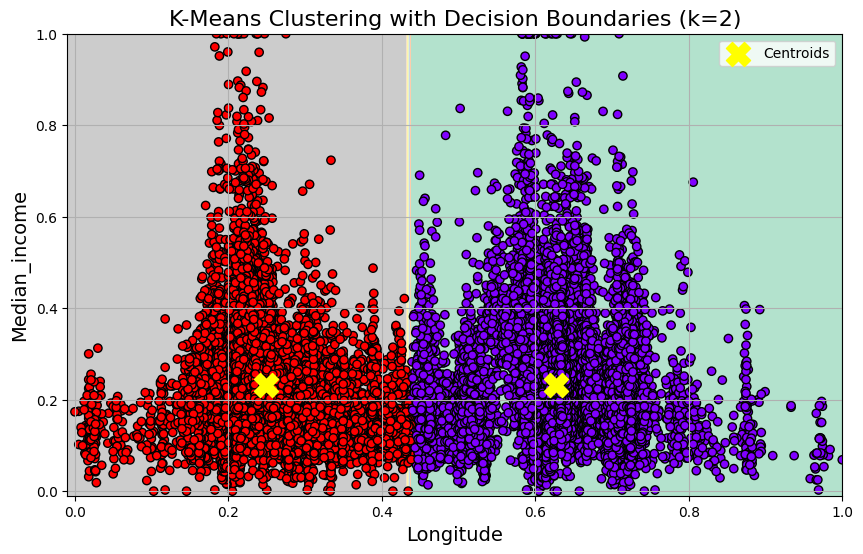

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Use longitude and latitude for plotting
X = new_data_scaled[['longitude', 'median_income']]

# Train KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=2, random_state=42)  # Use optimal k from the elbow method
kmeans.fit(X)

# Create a meshgrid for the feature space (longitude, latitude)
x_min, x_max = X['longitude'].min() - 0.01, X['longitude'].max() + 0.01
y_min, y_max = X['median_income'].min() - 0.01, X['median_income'].max() + 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the cluster for each point in the meshgrid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the result to match the shape of the meshgrid
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap='Pastel2')  # Plot decision boundaries

# Plot the actual data points
plt.scatter(X['longitude'], X['median_income'], c=kmeans.labels_, cmap='rainbow', edgecolor='k')

# Plot the cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', marker='X', label='Centroids')

plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Median_income', fontsize=14)
plt.title('K-Means Clustering with Decision Boundaries (k=2)', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


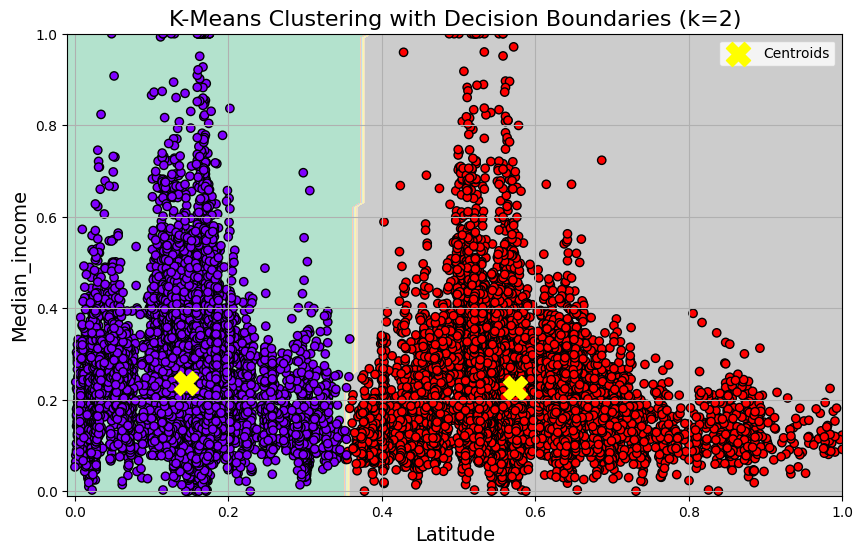

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


X = new_data_scaled[['latitude', 'median_income']]

# Train KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=2, random_state=42)  # Use optimal k from the elbow method
kmeans.fit(X)


x_min, x_max = X['latitude'].min() - 0.01, X['latitude'].max() + 0.01
y_min, y_max = X['median_income'].min() - 0.01, X['median_income'].max() + 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the cluster for each point in the meshgrid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the result to match the shape of the meshgrid
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap='Pastel2')  # Plot decision boundaries

# Plot the actual data points
plt.scatter(X['latitude'], X['median_income'], c=kmeans.labels_, cmap='rainbow', edgecolor='k')

# Plot the cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', marker='X', label='Centroids')

plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Median_income', fontsize=14)
plt.title('K-Means Clustering with Decision Boundaries (k=2)', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


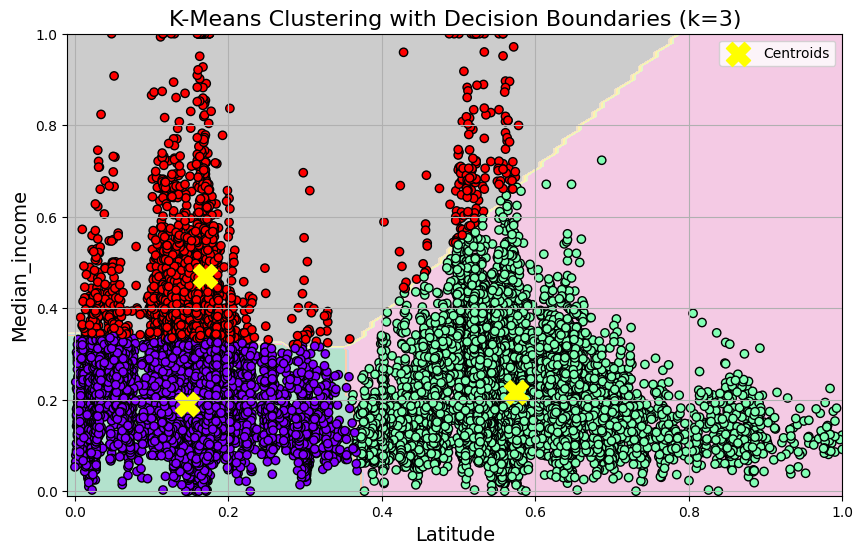

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


X = new_data_scaled[['latitude', 'median_income']]

# Train KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)  # Use optimal k from the elbow method
kmeans.fit(X)


x_min, x_max = X['latitude'].min() - 0.01, X['latitude'].max() + 0.01
y_min, y_max = X['median_income'].min() - 0.01, X['median_income'].max() + 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the cluster for each point in the meshgrid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the result to match the shape of the meshgrid
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap='Pastel2')  # Plot decision boundaries

# Plot the actual data points
plt.scatter(X['latitude'], X['median_income'], c=kmeans.labels_, cmap='rainbow', edgecolor='k')

# Plot the cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', marker='X', label='Centroids')

plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Median_income', fontsize=14)
plt.title('K-Means Clustering with Decision Boundaries (k=3)', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()


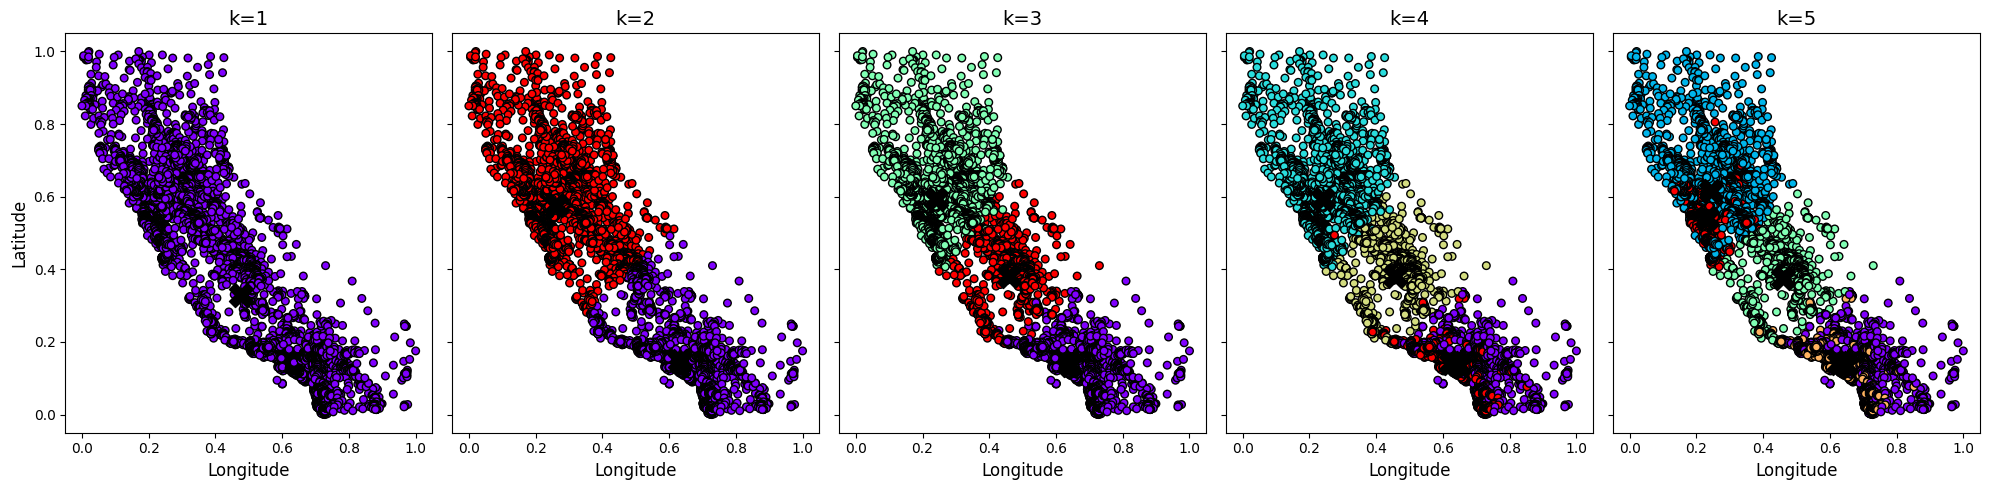

In [88]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Use longitude, latitude, and median_income for clustering
X = new_data_scaled[['longitude', 'latitude', 'median_income']]

# Create subplots for k values from 1 to 5
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

for k in range(1, 6):
    # Apply KMeans clustering for the current value of k
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    # Get the cluster labels for each point
    labels = kmeans.labels_

    # Plot longitude vs latitude with cluster labels
    axes[k-1].scatter(X['longitude'], X['latitude'], c=labels, cmap='rainbow', s=30, edgecolor='k')

    # Plot the centroids (only in 2D space: longitude, latitude)
    centroids = kmeans.cluster_centers_
    axes[k-1].scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', marker='X', label='Centroids')

    # Set plot title and labels
    axes[k-1].set_title(f'k={k}', fontsize=14)
    axes[k-1].set_xlabel('Longitude', fontsize=12)

axes[0].set_ylabel('Latitude', fontsize=12)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


# Silhouette score

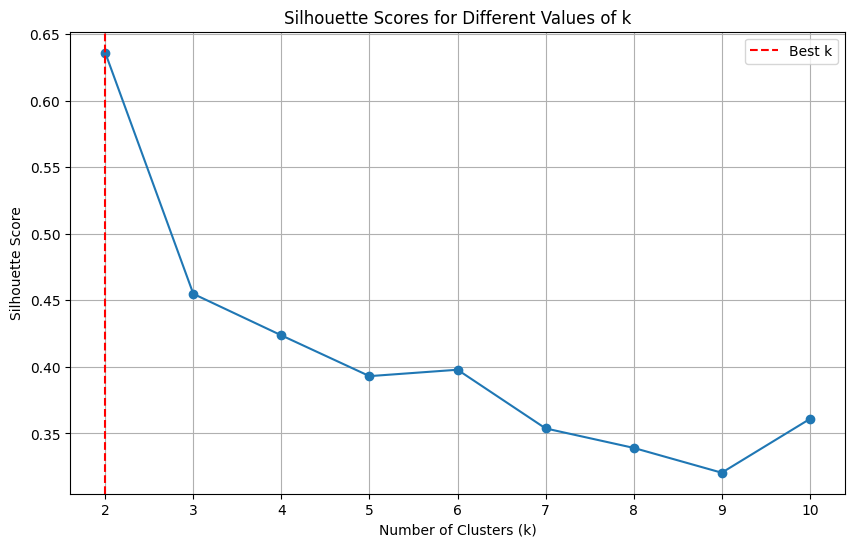

The best number of clusters is: 2


In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming `data` is your input DataFrame with features for clustering
X = new_data_scaled[['longitude', 'latitude', 'median_income']].values  # Adjust as necessary

# Initialize lists to store silhouette scores
silhouette_scores = []
k_values = range(2, 11)  # You can adjust the range as needed

# Loop over the range of k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(X)  # Fit and predict cluster labels
    score = silhouette_score(X, y_pred)  # Calculate silhouette score
    silhouette_scores.append(score)  # Store the score

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()
plt.axvline(x=k_values[np.argmax(silhouette_scores)], color='red', linestyle='--', label='Best k')
plt.legend()
plt.show()

# Get the best k based on maximum silhouette score
best_k = k_values[np.argmax(silhouette_scores)]
print(f"The best number of clusters is: {best_k}")


In [53]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.36085448735417425

Saving figure bad_n_clusters_plot


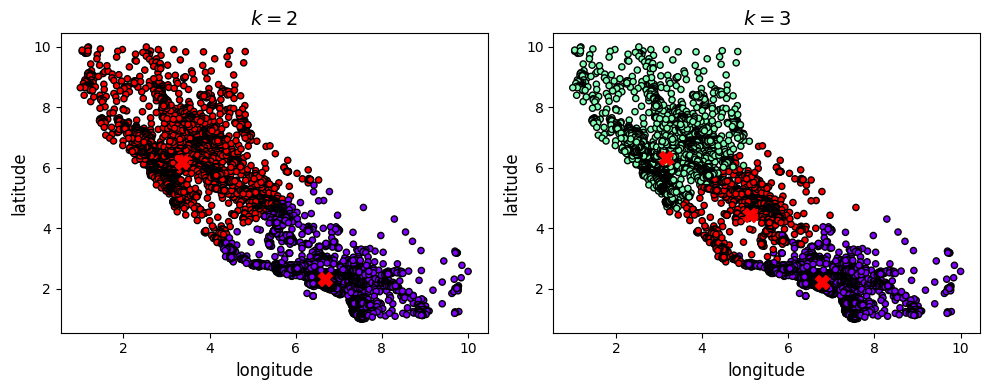

In [50]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Assuming 'plot_decision_boundaries' was intended
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Utility function to draw decision boundaries
    def plot_data(ax, clusterer, title=None):
        labels = clusterer.labels_
        ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='rainbow', s=20, edgecolor='k')
        # Plot centroids if available
        if hasattr(clusterer, 'cluster_centers_'):
            centroids = clusterer.cluster_centers_
            ax.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', marker='X', label='Centroids')
        if title:
            ax.set_title(title, fontsize=14)
        ax.set_xlabel(X.columns[0], fontsize=12)
        ax.set_ylabel(X.columns[1], fontsize=12)


    plot_data(axes[0], clusterer1, title1)
    plot_data(axes[1], clusterer2, title2)

    plt.tight_layout()

# Assuming 'save_fig' was intended for saving the plot
def save_fig(filename, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(".", filename + "." + fig_extension)
    print("Saving figure", filename)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

import os

# Use longitude, latitude, and median_income for clustering
X = new_data_scaled[['longitude', 'latitude', 'median_income']]

kmeans_k2 = KMeans(n_clusters=2, random_state=42)
kmeans_k3 = KMeans(n_clusters=3, random_state=42)

plot_clusterer_comparison(kmeans_k2, kmeans_k3, X, "$k=2$", "$k=3$")
save_fig("bad_n_clusters_plot")
plt.show()

Saving figure bad_n_clusters_plot


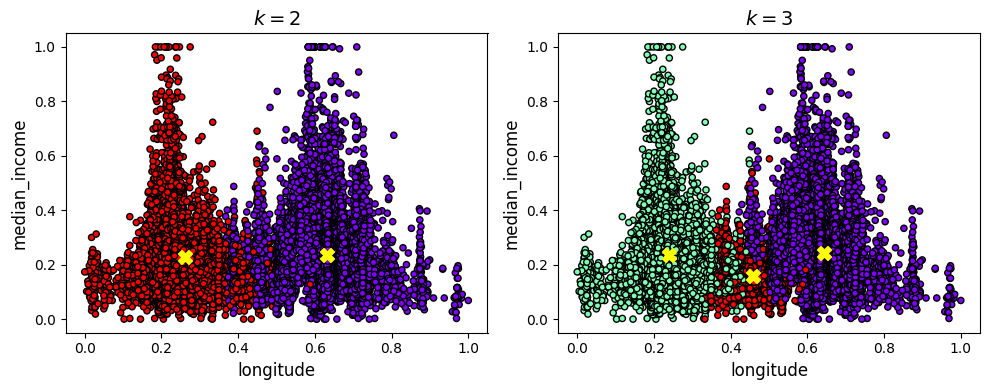

In [140]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Assuming 'plot_decision_boundaries' was intended
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Utility function to draw decision boundaries
    def plot_data(ax, clusterer, title=None):
        labels = clusterer.labels_
        ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='rainbow', s=20, edgecolor='k')
        # Plot centroids if available
        if hasattr(clusterer, 'cluster_centers_'):
            centroids = clusterer.cluster_centers_
            ax.scatter(centroids[:, 0], centroids[:, 1], s=100, c='yellow', marker='X', label='Centroids')
        if title:
            ax.set_title(title, fontsize=14)
        ax.set_xlabel(X.columns[0], fontsize=12)
        ax.set_ylabel(X.columns[1], fontsize=12)


    plot_data(axes[0], clusterer1, title1)
    plot_data(axes[1], clusterer2, title2)

    plt.tight_layout()

# Assuming 'save_fig' was intended for saving the plot
def save_fig(filename, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(".", filename + "." + fig_extension)
    print("Saving figure", filename)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

import os

# Use longitude, latitude, and median_income for clustering
X = new_data_scaled[['longitude', 'median_income','latitude' ]]

kmeans_k2 = KMeans(n_clusters=2, random_state=42)
kmeans_k3 = KMeans(n_clusters=3, random_state=42)

plot_clusterer_comparison(kmeans_k2, kmeans_k3, X, "$k=2$", "$k=3$")
save_fig("bad_n_clusters_plot")
plt.show()

Saving figure bad_n_clusters_plot


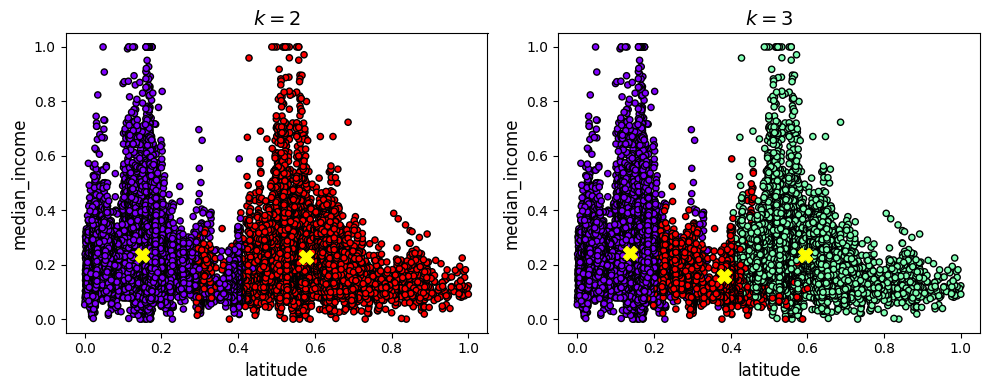

In [142]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Assuming 'plot_decision_boundaries' was intended
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Utility function to draw decision boundaries
    def plot_data(ax, clusterer, title=None):
        labels = clusterer.labels_
        ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='rainbow', s=20, edgecolor='k')
        # Plot centroids if available
        if hasattr(clusterer, 'cluster_centers_'):
            centroids = clusterer.cluster_centers_
            ax.scatter(centroids[:, 0], centroids[:, 1], s=100, c='yellow', marker='X', label='Centroids')
        if title:
            ax.set_title(title, fontsize=14)
        ax.set_xlabel(X.columns[0], fontsize=12)
        ax.set_ylabel(X.columns[1], fontsize=12)


    plot_data(axes[0], clusterer1, title1)
    plot_data(axes[1], clusterer2, title2)

    plt.tight_layout()

# Assuming 'save_fig' was intended for saving the plot
def save_fig(filename, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(".", filename + "." + fig_extension)
    print("Saving figure", filename)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

import os

# Use longitude, latitude, and median_income for clustering
X = new_data_scaled[['latitude','median_income','longitude'  ]]

kmeans_k2 = KMeans(n_clusters=2, random_state=42)
kmeans_k3 = KMeans(n_clusters=3, random_state=42)

plot_clusterer_comparison(kmeans_k2, kmeans_k3, X, "$k=2$", "$k=3$")
save_fig("bad_n_clusters_plot")
plt.show()

In [54]:
kmeans_k2.inertia_

51503.517882705906

In [55]:
kmeans_k3.inertia_

43768.564465949785

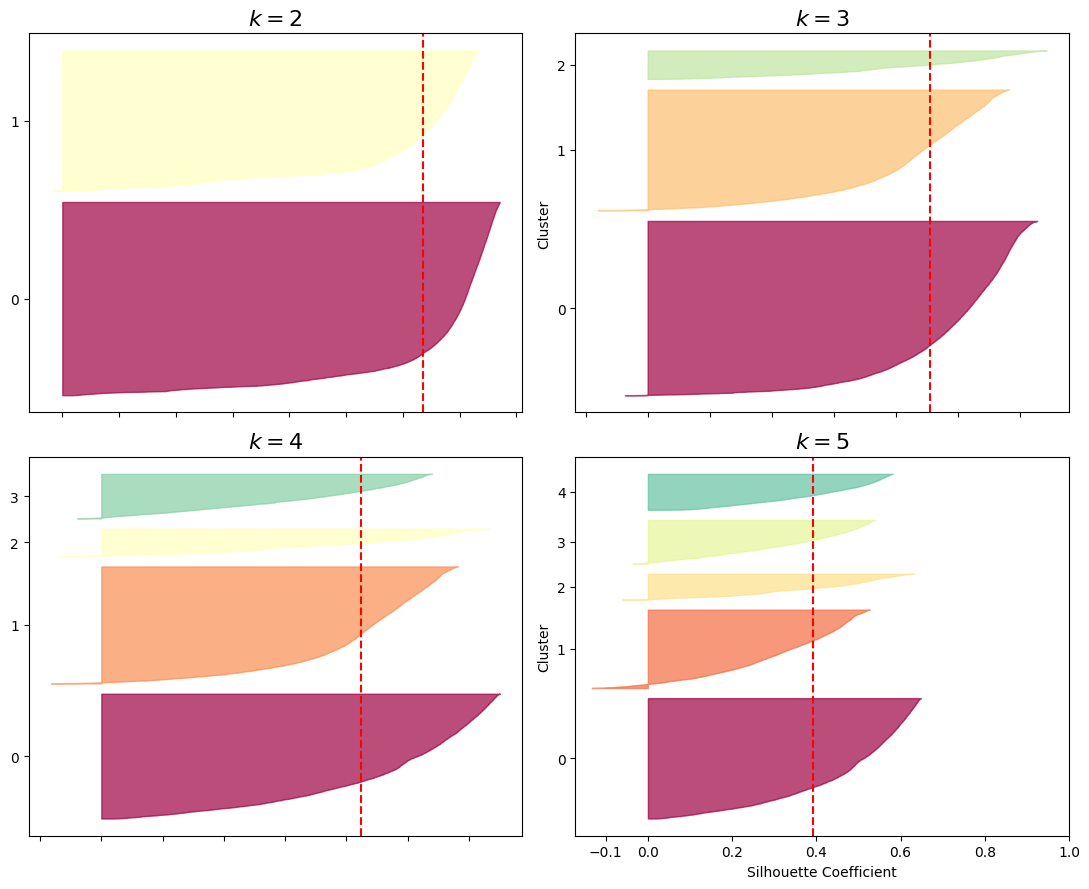

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

# Assuming `kmeans_per_k` is already defined and contains KMeans models for k=2 to k=5
plt.figure(figsize=(11, 9))

# Adjusting the range for k from 2 to 5
for k in range(2, 6):  # This will iterate k=2, 3, 4, 5
    plt.subplot(2, 2, k - 1)  # Adjust subplot index

    y_pred = kmeans_per_k[k - 1].labels_  # Using k-1 for 0-indexing
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []

    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))

    if k in (3, 5):
        plt.ylabel("Cluster")

    if k == 5:
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    # Draw vertical line for the average silhouette score for the current k
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$", fontsize=16)

plt.tight_layout()
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.6359861139128495
For n_clusters = 3 The average silhouette_score is : 0.45484274999820135
For n_clusters = 4 The average silhouette_score is : 0.3532832879371124
For n_clusters = 5 The average silhouette_score is : 0.39148615144961874


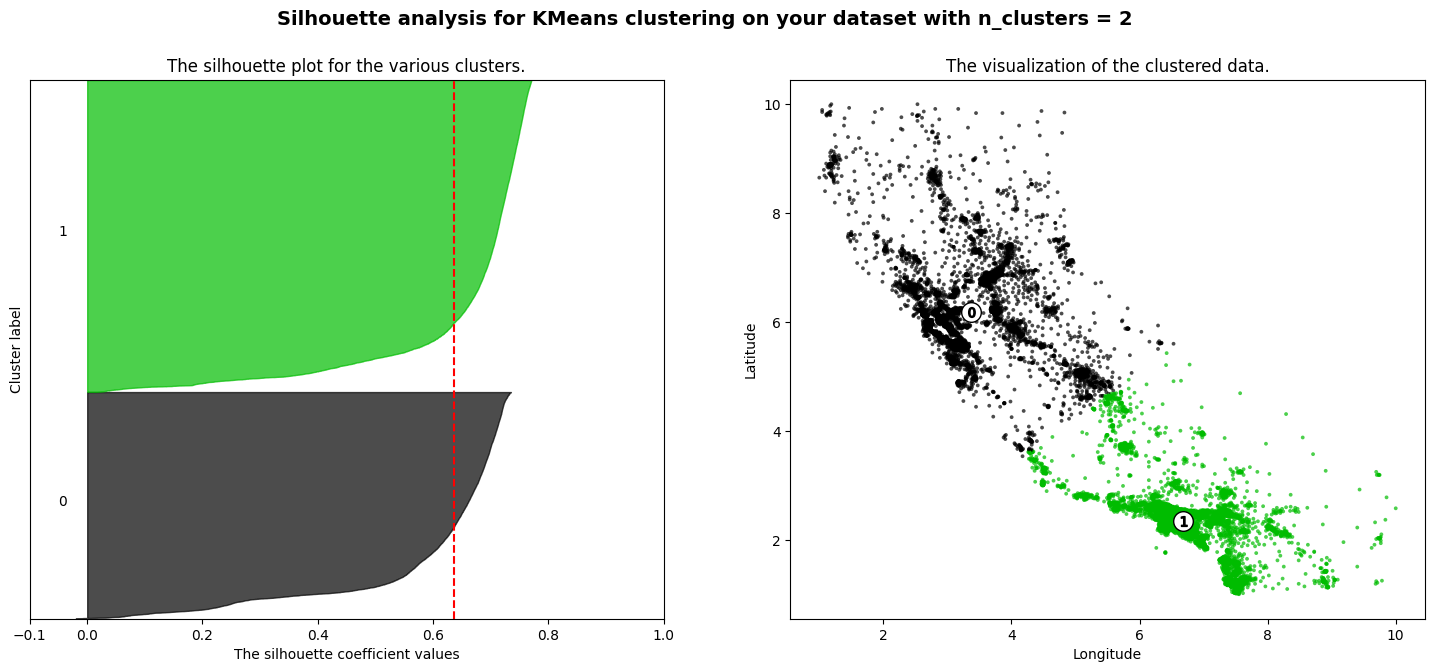

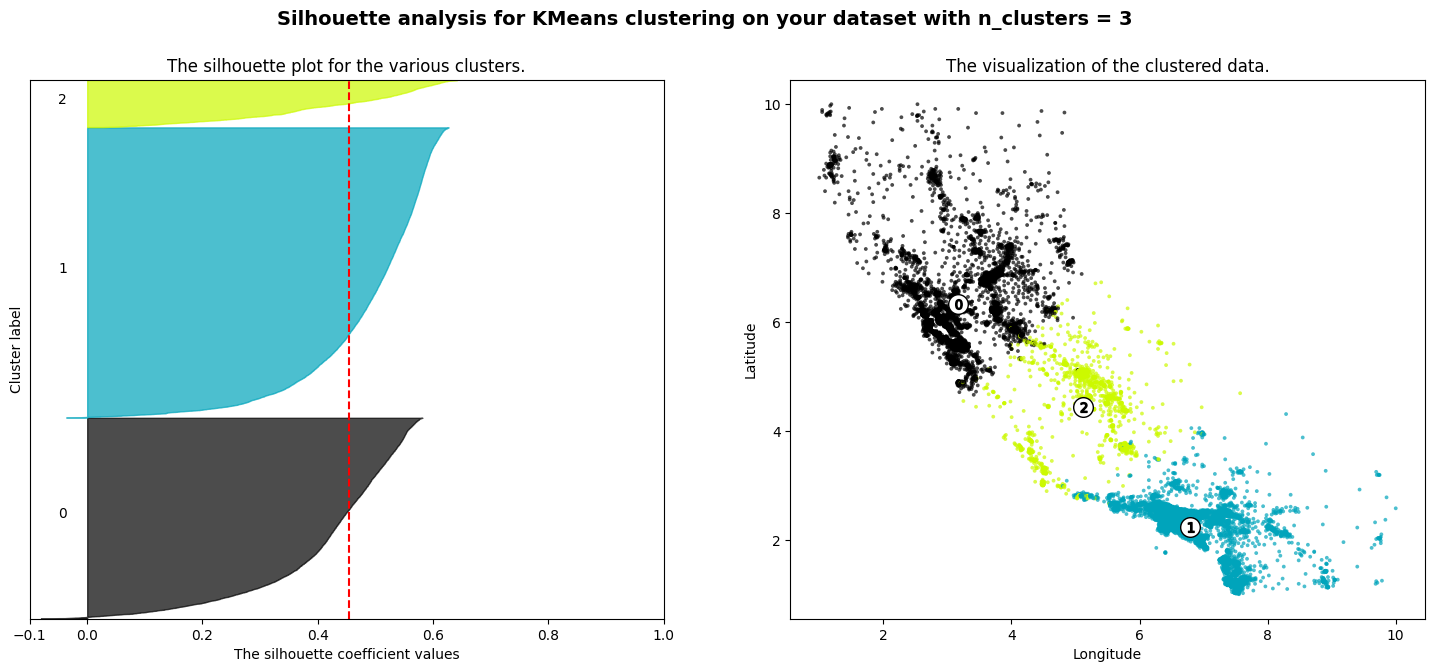

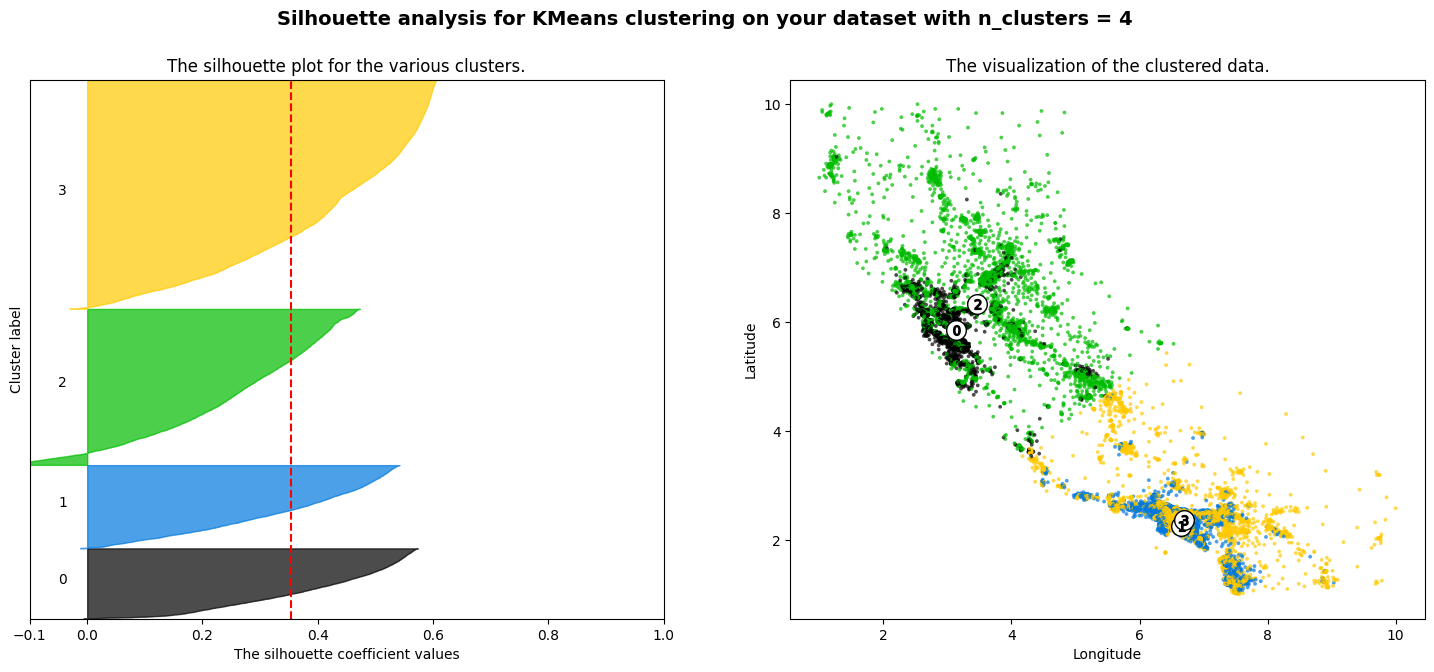

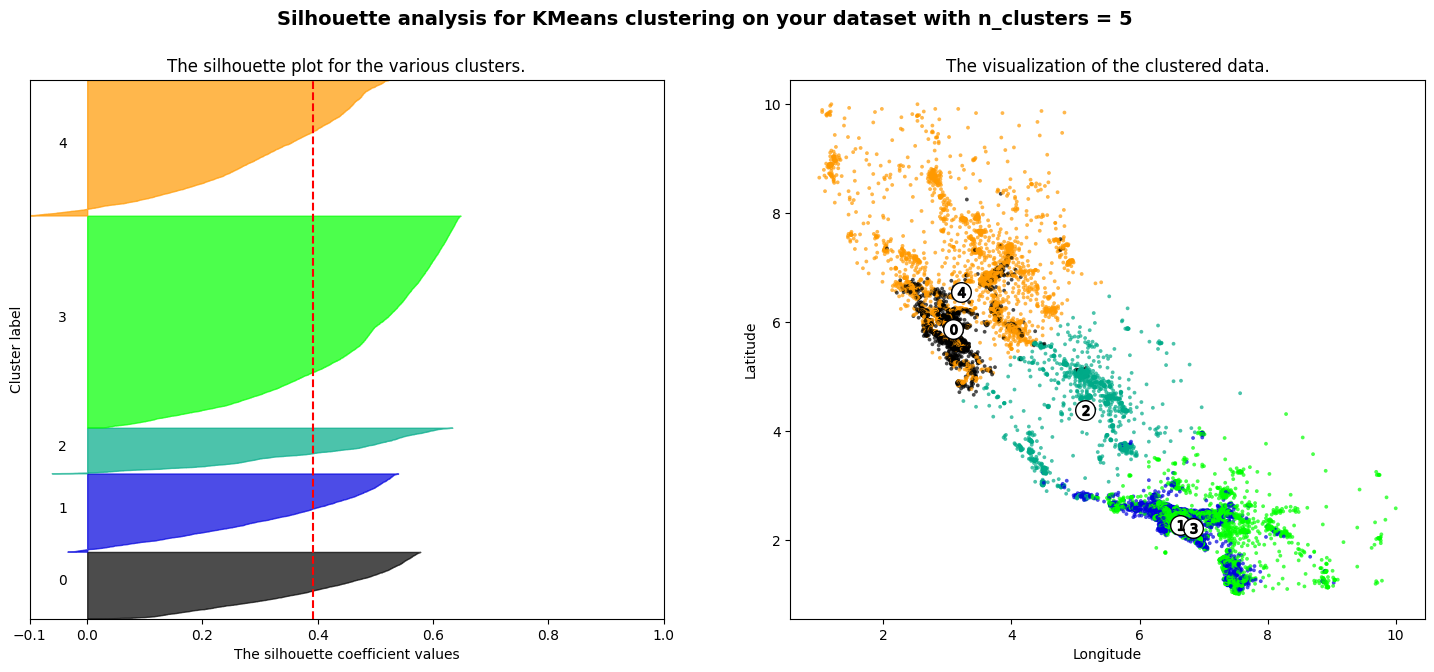

In [72]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Assuming you have a DataFrame `data` with relevant features
# Extract the features for clustering
X = new_data_scaled[['longitude', 'latitude', 'median_income']].values  # Use your scaled data

# Define the range of clusters
range_n_clusters = [2, 3, 4, 5]  # Modify this range as needed

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0,
                          ith_cluster_silhouette_values,
                          facecolor=color,
                          edgecolor=color,
                          alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the y-axis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Longitude")
    ax2.set_ylabel("Latitude")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on your dataset with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()
